# Analisi modello di Curie-Weiss

## Descrizione file
**Nome file:** esperimenti-tesi.ipynb  
**Autore:** Francesco Tosello  
**Contenuto:** Simulazioni numeriche per validare i risultati analitici ottenuti e descritti nella tesi.  

## Descrizione teorica

Il modello, all'equilibrio, è dato dalla seguente Hamiltoniana (n numero di spin):

$ H = - \frac{J}{2} \sum_{i,j} \sigma^i \sigma^j - h \sum_i \sigma^i $

oppure, posto $ m = 1/n \sum_i \sigma^i $,   

$ H = - n ( \frac{J}{2} m^2 - h m ) $

Il principio variazionale è:
$ \alpha(m) = log 2 + log cosh ( \beta (m + h)) - \frac{\beta m^2}{2} $

## Analisi e risultati

### Intestazione

Caricamento dei moduli necessari

In [1]:
import numpy as np
from scipy.optimize import fsolve

%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import animation as anim
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['text.usetex'] = True # serve per TeX
plt.rcParams['font.size'] = '19'

Impostazione dei colori

In [2]:
from colors.utils import load_cmap

In [3]:
SEQ_CMAP = 'bordeaux-seq'
DIV_CMAP = 'blue-bordeaux-div'

In [4]:
seqcmap = load_cmap(SEQ_CMAP)
divcmap = load_cmap(DIV_CMAP)

Crea un generatore di numeri casuali

In [5]:
rng = np.random.default_rng()

### Analisi variazionale
Detta $ f_{n,\beta} = - \frac{1}{\beta n} log Z_n $ l'energia interna per particella, 
si trova che $ {lim}_{n \rightarrow + \inf} f_{n, \beta} = - \frac{1}{\beta n} {sup}_m \alpha(m) $
con $ \alpha(m) = log 2 + log \, cosh ( \beta (m + h)) - \frac{\beta m^2}{2} $
quindi studio la funzione $\alpha$.

In [6]:
def alpha(m, b, h, J):
    return np.log(2) + np.log( np.cosh( b * (J*m + h) ) ) - b/2 * np.square(m) * J

In [7]:
h = 0.05; # try -0.1 <= h <= 0.1
J = 1;

resol = 100
mmx = 1.2;
bmn = 0.1; bmx = 2;

m = np.linspace(-mmx, mmx, resol)
b = np.linspace(bmn, bmx, resol)
M, B = np.meshgrid(m, b)


A = alpha(M, B, h, J)

<IPython.core.display.Javascript object>


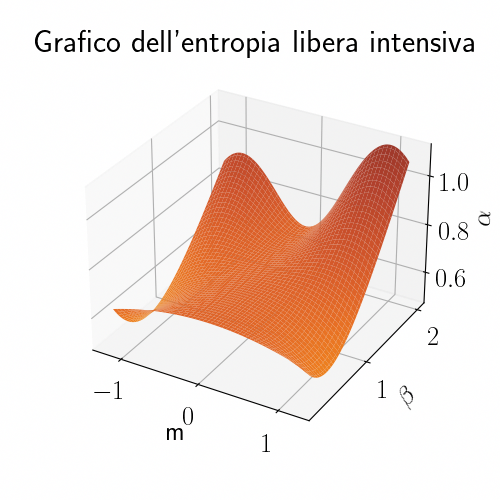

In [8]:
fig, ax = plt.subplots(figsize = plt.figaspect(1), dpi = 100, subplot_kw={"projection": "3d"})

ax.plot_surface(M, B, A, cmap = seqcmap)

ax.set_title(r"Grafico dell'entropia libera intensiva")
ax.set_xlabel('m')
ax.set_ylabel(r'$\beta$')
ax.set_zlabel(r"$\alpha$")

plt.show()

Come si evince dal grafico, è concava per $\beta < 1$.
Per $h=0$ notiamo che è simmetrica e quando $\beta > 1$ sviluppa due punti di massimo.  

Per trovare i punti di massimo si giunge ad un'equazione che li caratterizza, detta di autoconsistenza che è: 
$ m = tanh( \beta (m J + h)) $.

In [9]:
def selfconsistence(m, h, b):
    return m - np.tanh( b * (m + h))

def optimum_m(h, b, h0_start = 1):
    '''
    h0_start seleziona il punto di partenza per la ricerca degli zeri nel caso in cui h = 0.
    '''
    return fsolve(selfconsistence, np.heaviside(h, (h0_start +1)/2)*2-1, args = (h, b))[0]

<IPython.core.display.Javascript object>


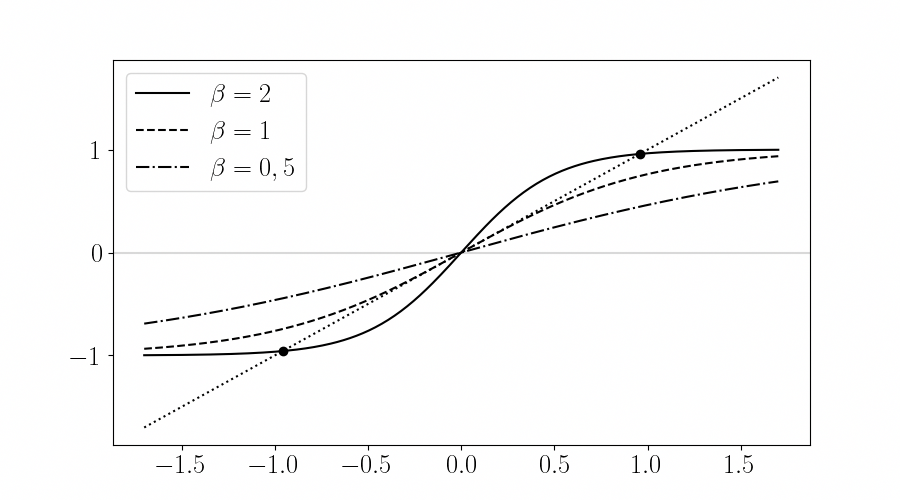

In [10]:
pts = np.linspace(-1.7, 1.7, 300)
th1 = np.tanh(2 * pts)
th2 = np.tanh(pts)
th3 = np.tanh(0.5 * pts)

fig = plt.figure()
ax = fig.gca()

ax.axhline(0, color = 'gray', alpha = 0.3)
ax.plot(pts, pts, 'k:')
ax.plot(pts, th1, '-', c = 'k',label = "$\\beta = 2$")
ax.plot(optimum_m(0, 2, 1), optimum_m(0, 2, 1), marker = 'o', c = 'k')
ax.plot(optimum_m(0, 2, -1), optimum_m(0, 2, -1), marker = 'o', c = 'k')
ax.plot(pts, th2, '--', c = 'k', label = "$\\beta = 1$")
ax.plot(pts, th3, '-.', c= 'k', label = "$\\beta = 0,5$")
ax.legend()

In [11]:
resol = 100;
hmx = 1.5;
bmn = 0; bmx = 2;

J = 1
h = np.linspace(- np.abs(hmx), np.abs(hmx), resol)
b = np.linspace(bmn, bmx, resol)
H, B = np.meshgrid(b, h)

In [12]:
maxalpha = []
for x in h:
    row = []
    for y in b:
        row.append(optimum_m(x, y))
    maxalpha.append(row)
maxalpha = np.array(maxalpha)

malpha1 = np.array([optimum_m(0, y, 1) for y in b])
malpha2 = np.array([optimum_m(0, y, -1) for y in b])

<IPython.core.display.Javascript object>


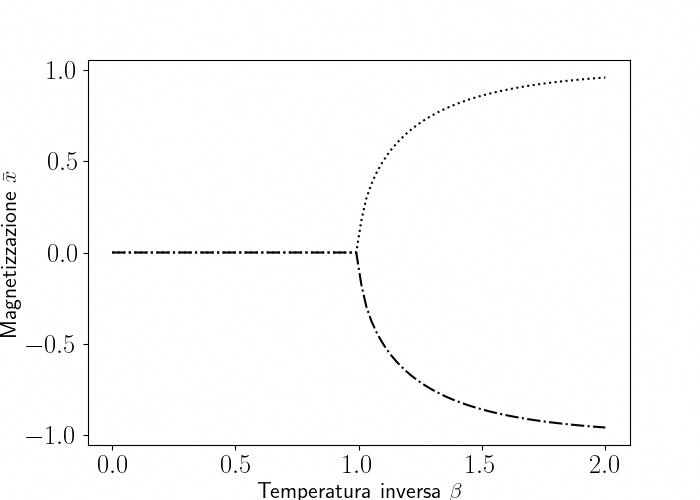

In [13]:
fig = plt.figure(figsize = (7,5))
ax = fig.gca()

ax.set_xlabel(r'Temperatura inversa $\beta$', fontsize = 16)
ax.set_ylabel(r'Magnetizzazione $\bar{x}$', fontsize = 16)

ax.plot(b, malpha1, 'k:')
ax.plot(b, malpha2, 'k-.')

Notare che i punti di massimo ottenuti per $h \rightarrow 0^{+}$ e per $h \rightarrow 0^{-}$ sono opposti se $\beta >1$.

<IPython.core.display.Javascript object>


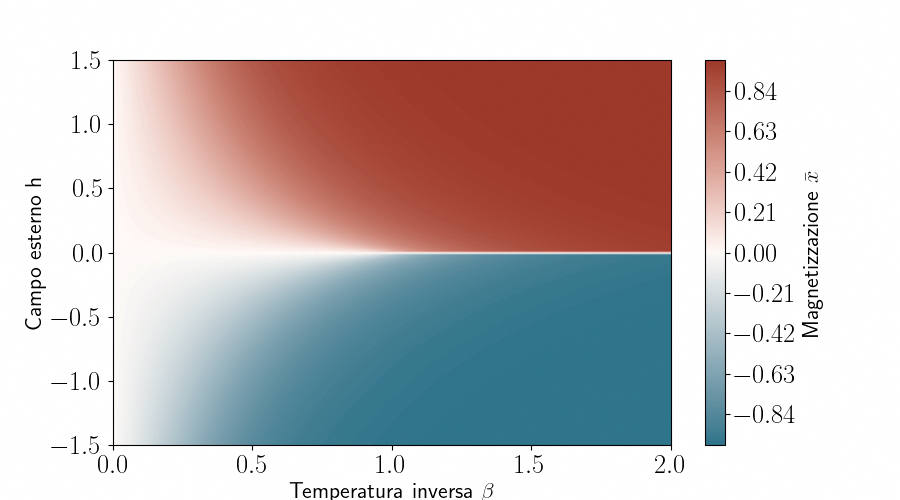

Text(0, 0.5, 'Magnetizzazione $\\bar{x}$')

In [14]:
fig = plt.figure()
ax = fig.gca()

ax.set_xlabel(r'Temperatura inversa $\beta$', fontsize = 16)
ax.set_ylabel('Campo esterno h', fontsize = 16)

ctplt = ax.contourf(H, B, maxalpha, 200, cmap = divcmap)
cbar = fig.colorbar(ctplt, ax = ax)
cbar.ax.set_ylabel(r'Magnetizzazione $\bar{x}$', fontsize = 16)

<IPython.core.display.Javascript object>


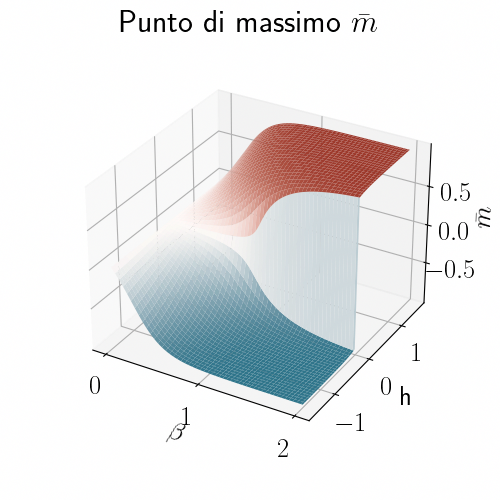

In [15]:
fig, ax = plt.subplots(figsize = plt.figaspect(1), dpi = 100, subplot_kw={"projection": "3d"})
fig.suptitle(r"Punto di massimo $\bar{m}$")

ax.plot_surface(H, B, maxalpha, cmap = divcmap)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel('h')
ax.set_zlabel(r'$\bar{m}$')

plt.show()

### Analisi dinamica MonteCarlo

In [16]:
def parallel_dyn(s, beta, cycles = 1):
    n = len(s)
    m = s.mean()
    
    upd_idx = rng.integers(0, n, size = cycles)
    p_flip = rng.uniform(size = cycles)
    for c in range(cycles):
        s_in = s[upd_idx[c]]/n
        m_i = m - s_in
    
        if (m_i * s_in < 0) or (p_flip[c] <= np.exp(-2 * beta * np.abs(m_i))):
            s[upd_idx[c]] *= -1
            m += 2 * s_in
            
    return s

In [17]:
def sequential_dyn(s, beta):
    n = len(s)
    m = s.mean()
    
    p_flip = rng.uniform(size = n)
    for i in range(n):
        s_in = s[i]/n
        m_i = m - s_in
        
        if (m_i * s_in < 0) or (p_flip[i] <= np.exp(-2 * beta * np.abs(m_i))):
            s[i] *= -1
            m += 2 * s_in
            
    return s

#### Esempio di una dinamica

In [18]:
L = 20;
N = L*L # taglia del sistema, uso griglie quadrate per la visualizzazione

T = 1500 # step temporali
intvl = 10 # millisecondi di intervallo
speed = N # cicli eseguiti per ogni punto sul grafico, nel caso parallelo

b = 1.06 # beta

s0 = rng.integers(2, size = N)*2 -1 # initial state

<IPython.core.display.Javascript object>


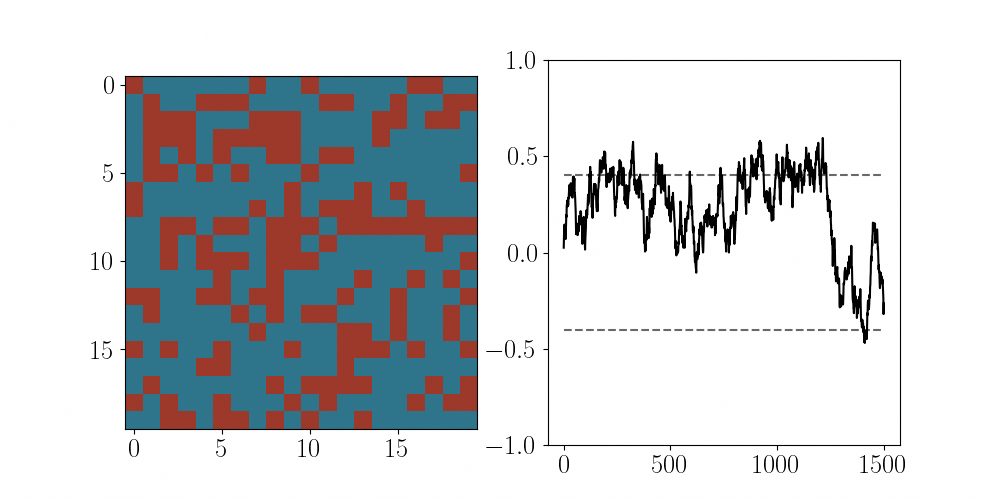

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = plt.figaspect(0.5))
ax2.set_ylim(-1,1)

eq_avg = optimum_m(0, b)
ax2.hlines([eq_avg, - eq_avg], 0, T+1, colors = 'dimgrey', linestyles = 'dashed', label = "equilibrium average")

s = s0
times = range(T+1)

frames = []
mag = np.zeros(T+1)
for t in times:
    if t > 0:
        s = parallel_dyn(s, b, speed)
        #s = sequential_dyn(s, b)
    mag[t] = s.mean()
    im1 = ax1.imshow(np.reshape(s, (L,L)), cmap = divcmap.resampled(2), animated = True)
    im2, = ax2.plot(times, mag, 'k-')
    frames.append([im1, im2])
    
anim.ArtistAnimation(fig, frames, interval = intvl, repeat = False, blit = True)

#### Analisi della dinamica al variare di $\beta$

In [20]:
def play_dynamics(s, b, dyn = 'parallel'):
    
    mag = np.zeros(T+1)
    for t in range(T+1):
        if t>0:
            if dyn == 'parallel': s = parallel_dyn(s, b, N)
            elif dyn == 'sequential': s = sequential_dyn(s, b)
            else: raise ValueError("Parameter dyn must be either 'parallel' or 'sequential'.")
        mag[t] = s.mean()
    
    return np.array(mag)

In [21]:
T = 100
resol = 40
mnb = 0; mxb = 3;

beta = np.linspace(mnb, mxb, resol)

In [22]:
m_teor = np.zeros(resol)
for i in range(resol):
    m_teor[i] = optimum_m(0, beta[i])

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [24]:
s0 = rng.integers(2, size = N)*2 -1

mag = np.zeros((resol, T+1))
for i in range(resol):
    mag[i] = play_dynamics(s0, beta[i])

<IPython.core.display.Javascript object>


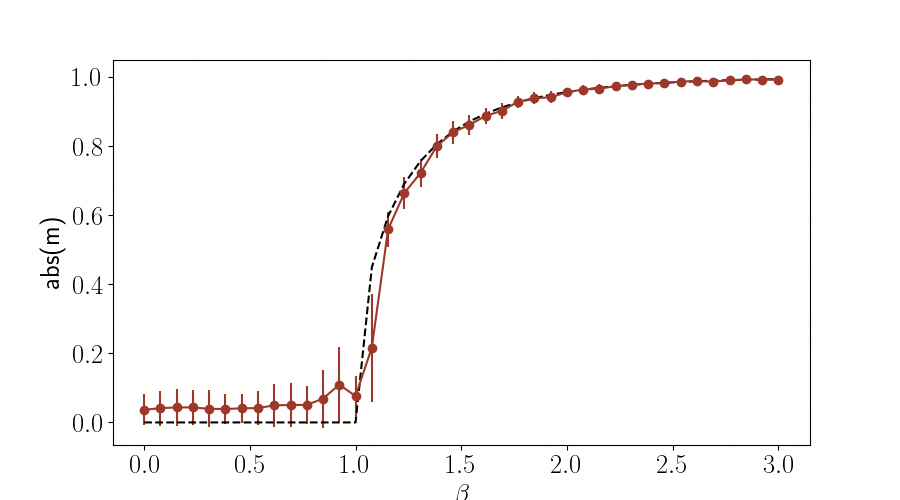

In [25]:
fig = plt.figure()
ax = fig.gca()

ax.set_xlabel(r"$\beta$")
ax.set_ylabel("abs(m)")

ax.errorbar(beta, np.mean(np.abs(mag), axis = 1), yerr = np.std(mag, axis = 1), fmt = 'o-', c = seqcmap(255))
ax.plot(beta, m_teor, 'k--')